<a href="https://colab.research.google.com/github/hyunseo318/ESAA_22-2/blob/main/%EC%B0%A8%EC%9B%90%EC%B6%95%EC%86%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ch06. 차원 축소**


##**01. 차원축소(Dimension Reduction) 개요**
**차원 축소** : 매우 많은 피처로 구성된 다차원 데이터세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것
- 피처 선택(feature selection)
  - 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거하고, 데이터의 특징을 잘 나타내는 주요 피처만 선택하는 것
- 피처 추출(feature extraction)
  - 기존 피처를 단순 압축이 아닌, 피처를 함축적으로 더 잘 설명할 수 있는 또 다른 공간으로 매핑해 추출하는 것
  - 기존 피처가 인지하기 어려웠던 잠재적인 요소를 추출하는 것
  - PCA, SVD, NMF 



## **02. PCA(Principal Component Analysis)**

 


###**PCA 개요**
**PCA** : 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분(Principal Component)을 추출해 차원을 축소하는 기법
- 기존 데이터의 정보 유실이 최소화된다.
- 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소, PCA의 주성분이 됨

1) 가장 큰 데이터 변동성(Variance)을 기반으로 첫 번째 벡터 축을 생성


2) 이 벡터 축에 직각이 되는 벡터(직교 벡터)를 축으로 함

3) 원본 데이터를 투영하면 벡터 축의 개수만큼의 차원으로 원본 데이터 축소


입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해될 수 있으며, 이렇게 분해된 고유벡터를 이용해 입력 데이터를 선형 변환하는 방식이 PCA



```
1. 입력 데이터 세트의 공분산 행렬을 생성
2. 공분산 행렬의 고유벡터와 고유값을 계산
3. 고유값이 가장 큰 순으로 K개(PCA변환 차수)만큼 고유벡터를 추출
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력데이터를 변환
```





In [ ]:
#iris 4개의 속성을 2개의 PCA차원으로 압축해 원래 데이터 세트와 압축된 데이터 세트가 어떻게 달라졌는지 확인
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()

#넘파이 데이터 세트를 판다스 DataFrame으로 변환
columns=['sepal_length','sepal_width','petal_length','petal_width']
irisDF=pd.DataFrame(iris.data,columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


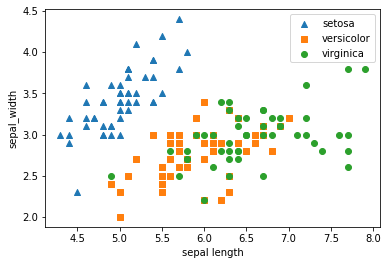

In [ ]:
#2차원으로 시각화
#setosa는 세모, versicolor은 네모, virginica는 동그라미로 표현
markers=['^','s','o']

#setosa의 target값은 0, versicolor은 1, virginica는 2. 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
  x_axis_data=irisDF[irisDF['target']==i]['sepal_length']
  y_axis_data=irisDF[irisDF['target']==i]['sepal_width']
  plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal_width')
plt.show()

- Setosa는 sepal width가 3.0보다 크고, sepal length가 6.0 이하인 곳에 일정하게 분포
- Versicolor랑 virginica는 비슷하게 분포돼있어 분류가 어려움

In [ ]:
#개별 속성 함께 스케일링
from sklearn.preprocessing import StandardScaler

#Target 값을 제외한 모든 속성 값을 StandardScaler을 통해 표준 정규 분포를 가지는 값들로 변환
iris_scaled=StandardScaler().fit_transform(irisDF.iloc[:,:-1])


In [ ]:
#스케일링 적용된 데이터 세트에 PCA 적용해 붓꽃 데이터를 2차원 PCA 데이터로 변환
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

#fit()과 transform()을 호출해 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca=pca.transform(iris_scaled)
print(iris_pca.shape)


(150, 2)


In [ ]:
#PCA변환된 데이터의 칼럼 명을 각각 pca_component_1,pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca=pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


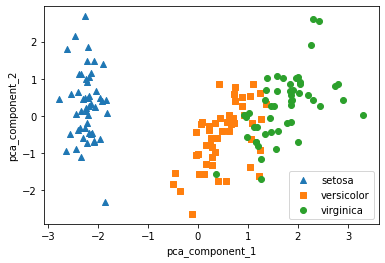

In [ ]:
#PCA 변환된 데이터 세트 2차원 상에서 시각화
#setosa는 세모 versicolor는 네모 virginica는 동그라미로 표시
markers=['^','s','o']

#pca_component_1을 x축,pc_component_2를 y축으로 scatter plot 수행
for i, marker in enumerate(markers):
  x_axis_data=irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
  y_axis_data=irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
  plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [ ]:
#PCA component별로 원본 데이터의 변동성 얼마나 반영하고 있는지
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


pca_component_1 : 전체 변동성의 72.9%

pca_component_2 : 전체 변동성의 22.8%

-> 전체 변동성의 95% 설명 가능

In [ ]:
#원본 붓꽃 데이터에 랜덤 포레스트 적용
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf=RandomForestClassifier(random_state=156)
scores=cross_val_score(rcf,iris.data,iris.target,scoring='accuracy',cv=3)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:',np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [ ]:
#기존 4차원 데이터를 2차원으로 PCA 변환한 데이터 세트에 랜덤 포레스트 적용
pca_X=irisDF_pca[['pca_component_1','pca_component_2']]
scores_pca=cross_val_score(rcf,pca_X,iris.target,scoring='accuracy',cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도:',scores_pca)
print('PCA 변환 데이터 평균 정확도:',np.mean(scores_pca))
#원본 데이터 세트 대비 예측 정확도 PCA 변환 차원 개수 따라 예측 성능 떨어짐


PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


###**신용카드 데이터 분석**

좀 더 많은 피처 가진 데이터 세트를 적은 PCA 컴포넌트 기반으로 변환한 뒤 예측 영향도가 어떻게 되는지 변환된 PCA 데이터 세트에 기반해서 비교

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df=pd.read_excel('/content/drive/MyDrive/ESAA/22-2/DATA/credit_card.xls',header=1,sheet_name='Data').iloc[0:,1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [3]:
#target 속성인 default 칼럼 y_target 변수로 별도 저장 후 피처 데이터는 default 제외 별도의 DF 생성
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'},inplace=True)
y_target=df['default']
X_features=df.drop('default',axis=1)

<AxesSubplot:>

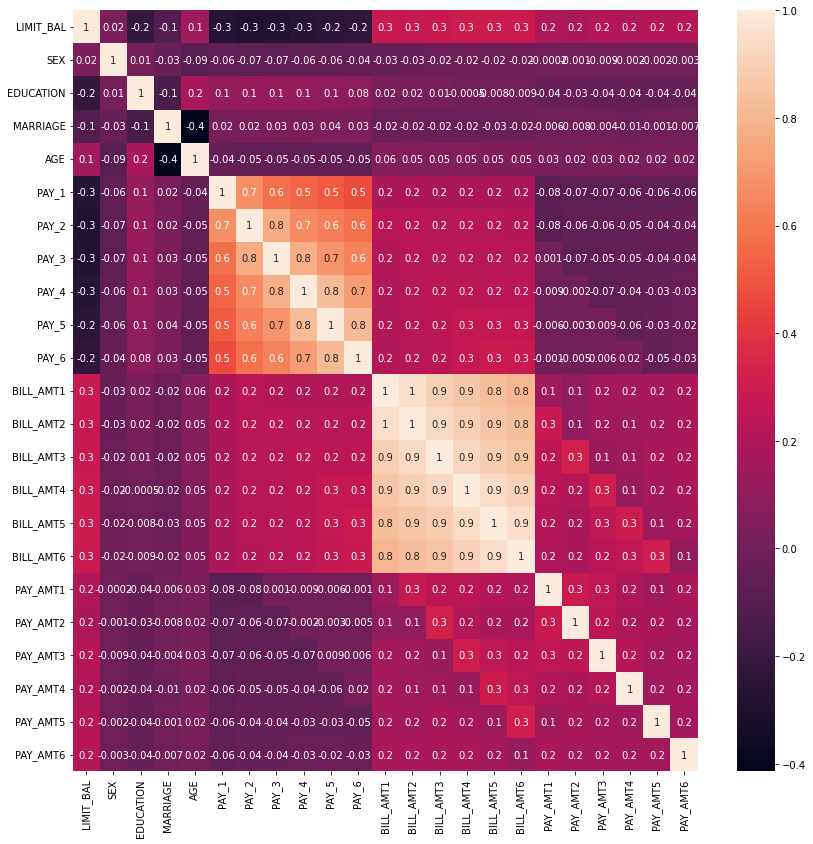

In [4]:
#heatmap으로 시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr=X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr,annot=True,fmt='.1g')

BILL_AMT1~BILL_AMT6 : 상관도가 대부분 0.9 이상으로 매우 높음
- 6개 속성을 2개의 컴포넌트로 PCA 변환한 뒤 개별 컴포넌트의 변동성을 explained_variance_ratio 속성으로 알아봄




In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#BILL_AMT1~BILL_AMT6까지의 6개의 속성명 생성
cols_bill = ['BILL_AMT'+ str(i) for i in range(1,7)]
print('대상 속성명:',cols_bill)

#2개의 PCA 속성을 가진 PCA 객체를 생성하고,explained_variance_ratio_계산을 위해fit() 호출
scaler=StandardScaler()
df_cols_scaled=scaler.fit_transform(X_features[cols_bill])
pca=PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:',pca.explained_variance_ratio_)


대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


In [11]:
#원본 데이터 세트와 6개의 컴포넌트로 PCA 변환한 데이터 세트의 분류 예측 결과를 상호 비교
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf=RandomForestClassifier(n_estimators=300,random_state=156)
scores=cross_val_score(rcf,X_features,y_target,scoring='accuracy',cv=3)

print('CV=3인 경우의 개별 Fold세트 별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

CV=3인 경우의 개별 Fold세트 별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


In [14]:
#6개의 컴포넌트로 PCA 변환한 데이터 세트에 대해서 동일하게 분류 예측 적용
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#원본 데이터 세트에 먼저 StandardScaler 적용
scaler=StandardScaler()
df_scaled=scaler.fit_transform(X_features)

#6개의 컴포넌트를 가진 PCA변환을 수행하고 cross_val_score()로 분류 예측 수행
pca=PCA(n_components=6)
df_pca=pca.fit_transform(df_scaled)
scores_pca=cross_val_score(rcf,df_pca,y_target,scoring='accuracy',cv=3)

print('CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도:',scores_pca)
print('PCA 변환 데이터 세트 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도: [0.7905 0.7963 0.8039]
PCA 변환 데이터 세트 평균 정확도:0.7969


- 전체 23개 속성의 약 1/4수준인 PCA 컴포넌트만으로도 원본 데이터를 기반으로 한 분류 예측 결과보다 약 1~2%의 예측 성능 저하만 발생
- 전체 속성의 1/4 정도만으로도 이정도 수치의 성능 예측을 유지할 수 있다는 것은 PCA의 뛰어난 압축 성능을 보여줌

차원 축소를 통해 데이터를 쉽게 인지하는데 활용할 수 있지만, 얼굴 인식과 같은 컴퓨터 비전(CV) 분야에 더 활발하게 적용




## **03. LDA(Linear Discriminant Analysis)**

###**LDA 개요**
LDA : 선형 판별 분석법
- PCA와 유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소하는 기법
- LDA는 **지도학습의 분류(Classification)**에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원 축소

|PCA|LDA|
|--|--|
|입력 데이터의 변동성이 가장 큰 축|입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축|



```
1. 클래스 내부와 클래스 간 분산 행렬을 구한다. 이 두 개의 행렬은 입력 데이터의 결정 값 클래스별로 개별 피처의 평균 벡터(mean vector)를 기반으로 구함
2. 고유 벡터 분해
3. 고유값이 가장 큰 순으로 K개(LDA 변환 차수만큼) 추출
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환
```



###**붓꽃 데이터 세트에 LDA 적용하기**

In [15]:
#붓꽃 데이터 세트를 사이킷런의 LDA 이용해 변환하고 그결과를 품종별로 시각화
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris=load_iris()
iris_scaled=StandardScaler().fit_transform(iris.data)

In [ ]:
#2개의 컴포넌트로 붓꽃 데이터를 LDA변환
#지도학습이므로 target 데이터 입력
lda=LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled,iris.target)
iris_lda=lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


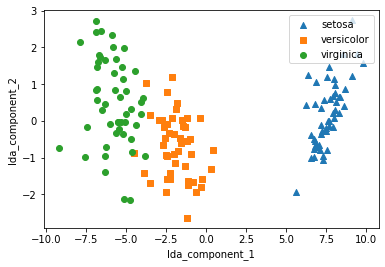

In [ ]:
#LDA 변환된 입력 데이터 값을 2차원 평면에 품종별로 표현
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
irisDF_lda=pd.DataFrame(iris_lda,columns=lda_columns)
irisDF_lda['target']=iris.target

#setosa는 세모,versicolor은 네모, virginica는 동그라미
markers=['^','s','o']

#setosa의 target값은 0, versicolor은 1, virginica는 2. 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
  x_axis_data=irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
  y_axis_data=irisDF_lda[irisDF_lda['target']==i]['lda_component_2']
  plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

## **04. SVD(Singular Value Decomposition)**

###**SVD 개요**
- 행렬 분해 기법 이용
- PCA는 정방행렬만 고유벡터로 분해 가능
- SVD는 행, 열의 크기가 다른 행렬에도 적용가능
  - m X n 크기의 행렬을 분해하는 것
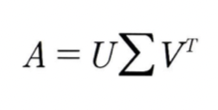

- 특잇값 분해로 불림
- U, V에 속하는 벡터는 특이벡터(Singular vector)이며, 모든 특이벡터는 직교하는 성질을 가짐
- 시그마는 대각행렬이며, 행렬의 대각에 위치한 값만 0이 아니고 나머지 위치의 값은 모두 0
  - 0이 아닌 값이 바로 행렬 A의 특이값


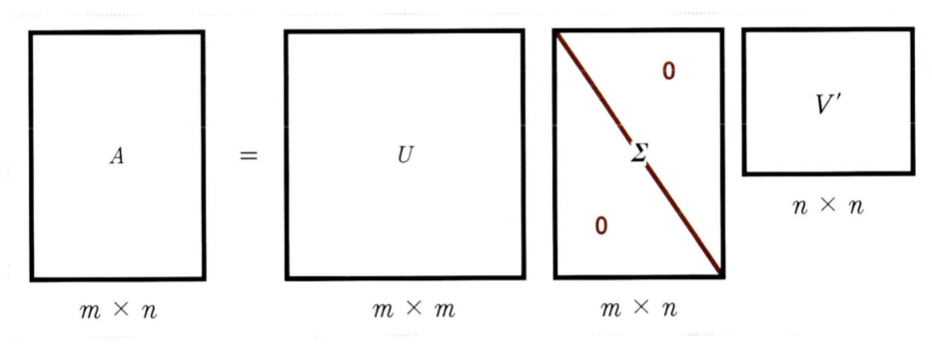
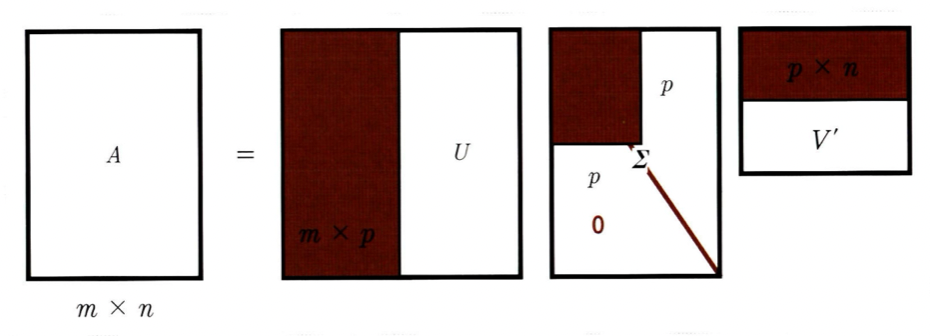


In [18]:
#넘파이의 svd 모듈 임포트
import numpy as np
from numpy.linalg import svd

#4x4 랜덤 행렬 a 생성
np.random.seed(121)
a=np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [17]:
U,Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n',np.round(Sigma,3))
print('Sigma Valud:\n', np.round(Sigma,3))
print('V transpose matrix:\n',np.round(Vt,3))

(4, 4) (4,) (4, 4)
U matrix:
 [3.423 2.023 0.463 0.079]
Sigma Valud:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [19]:
#Sigma를 다시 0을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U,Sigma_mat),Vt)
print(np.round(a_,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [20]:
#데이터 세트가 로우 간 의존성이 있을 경우
#행렬의 3번째 로우를 '첫번째+두번째 로우'로 업데이트

a[2] = a[0]+a[1]
a[3] = a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [21]:
#다시 SVD를 수행해 Sigma 값 확인
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n', np.round(Sigma,3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


- 이전과 차원은 같지만 Sigma 값 중 2개가 0으로 변함
  - 선형 독립인 로우 벡터의 개수가 2개
- Sigma의 0에 대응되는 U, Sigma, V의 데이터를 제외하고 복원
  - Sigma의 경우 앞의 2개 요소만 0이 아니므로 U 행렬 중 선행 두 개의 열만 추출하고, Vt의 경우는 선행 두 개의 행만 추출해 복원

In [22]:
#U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:,:2]
Sigma_ = np.diag(Sigma[:2])

#V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)

#U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_, Sigma_),Vt_)
print(np.round(a_,3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


**Truncated SVD**

Sigma 행렬에 있는 대각원소, 즉 특이값 중 상위 일부 데이터만 추출해 분해하는 방식
- 인위적으로 더 작은 차원의 U, Sigma, Vt로 분해하기 때문에 원본 행렬의 정확한 복구는 어려움
- 데이터 정보가 압축되어 분해됨에도 불구하고 상당한 수준으로 원본 행렬 근사




In [23]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

np.random.seed(121)
matrix=np.random.random((6,6))
print('원본 행렬:\n', matrix)
U, Sigma, Vt=svd(matrix, full_matrices=False)
print('\n 분해 행렬 차원:', U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

num_components=4
U_tr, Sigma_tr, Vt_tr=svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr=np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr)

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

 분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231

###**사이킷런 TruncatedSVD 클래스를 이용한 변환**
- PCA 클래스와 유사하게 fit(), transform()을 호출해 원본 데이터를 몇 개의 주요 컴포넌트로 차원 축소해 변환
- 원본 데이터를 Truncated SVD 방식으로 분해된 U*Sigma 행렬에 선형 변환해 생성



Text(0, 0.5, 'TruncatedSVD Component 2')

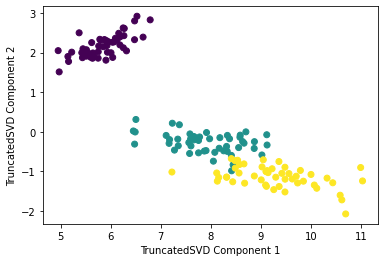

In [24]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()
iris_ftrs=iris.data

#2개의 주요 컴포넌트로 Truncated SVD변환
tsvd=TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd=tsvd.transform(iris_ftrs)

#산점도 2차원으로 TruncatedSVD 변환된 데이터 표현, 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

- TruncatedSVD, PCA 모두 SVD를 이용해 행렬 분해
- 붓꽃 데이터 스케일링 후 클래스 변환 해보면 두개가 거의 동일함


Text(0.5, 1.0, 'PCA Transformed')

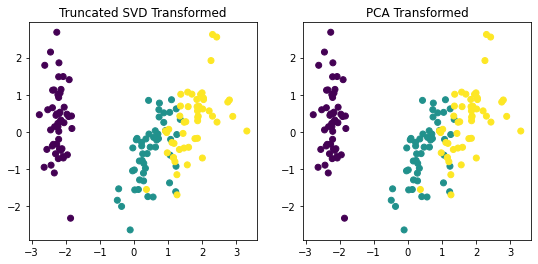

In [25]:
from sklearn.preprocessing import StandardScaler

#붓꽃 데이터를 StandardScaler로 변환
scaler=StandardScaler()
iris_scaled=scaler.fit_transform(iris_ftrs)

#스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd=TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd=tsvd.transform(iris_scaled)

#스케일링된 데이터를 기반으로 PCA 변환 수행
pca=PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca=pca.transform(iris_scaled)

#TruncatedSVD 변환 데이터를 왼쪽에, PCA 변환 데이터를 오른쪽에 표현
fig, (ax1, ax2)=plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
ax2.scatter(x=iris_pca[:,0], y=iris_pca[:,1], c=iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

In [26]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_-tsvd.components_).mean())

2.3364990497931616e-15
2.0816681711721685e-17


- 모두 0에 가까운 값이므로 2개의 변환이 서로 동일함을 알 수 있음
- 데이터 세트가 스케일링으로 데이터 중심이 동일해지면 사이킷런의 SVD와 PCA는 동일한 변환을 수행(PCA가 SVD알고리즘으로 구현됨)
  - PCA는 밀집 행렬(Dense Matrix)에 대한 변환만 가능
  - SVD는 희소 행렬(Sparse Matrix)에 대한 변환도 가능
- SVD는 컴퓨터 비전 영역에서 이미지 압축을 통한 패턴 인식과 신호 처리 분야에 사용
- 텍스트의 토픽 모델링 기법인 LSA(Latent Semantic Analysis)의 기반 알고리즘

## **05. NMF(Non-Negative Matrix Factorization)**

###**NMF 개요**
Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사 방식의 변형
- 원본 행렬 내의 모든 원소 값이 모두 양수(0이상)라는게 보장되면 다음과 같이 좀 더 간단하게 두 개의 기반 양수 행렬로 분해될 수 있는 기법을 지칭
- 분해된 행렬은 잠재 요소를 특성으로 가지게 됨
- W : 원본 행에 대해 잠재 요소의 값이 얼마나 되는지에 대응
- H : 잠재 요소가 원본 열(원본 속성)로 어떻게 구성됐는지 나타내는 행렬
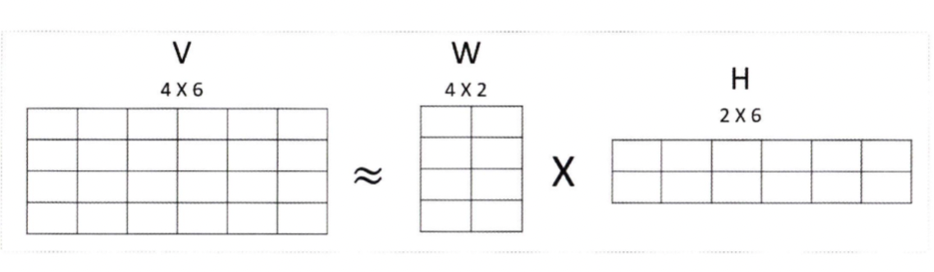


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'NMF Component 2')

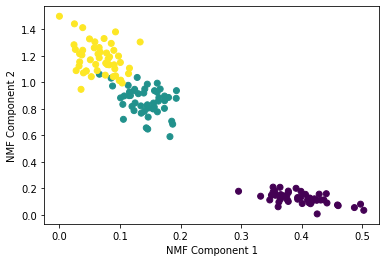

In [27]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()
iris_ftrs=iris.data
nmf=NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf=nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y=iris_nmf[:,1], c=iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

- 이미지 압축을 통한 패턴인식, 텍스트의 토픽 모델링 기법, 문서 유사도 및 클러스터링에 사용
- 영화 추천과 같은 영역